In [1]:
%matplotlib inline

In [15]:
# my imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Recognizing Handwritten digits

## The Digit Dataset

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

The first 4 digits:

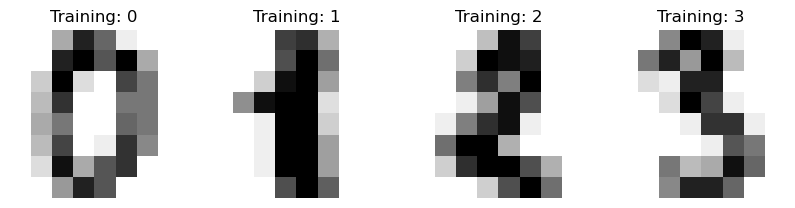

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
type(digits.images)

numpy.ndarray

In [6]:
len(digits.images[0])

8

In [7]:
first_digit = digits.images[0]

The data set is represented in 8 x 8 float matrices.

In [8]:
first_digit

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

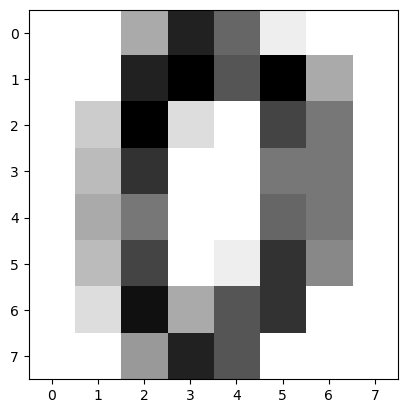

In [9]:
plt.imshow(first_digit, cmap='gray_r', interpolation="nearest")

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
len(digits.target)

1797

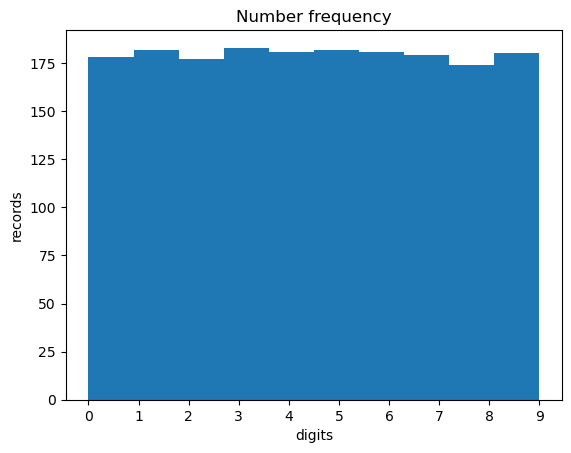

In [13]:
plt.hist(digits.target)
plt.xlabel('digits')
plt.ylabel('records')
plt.title('Number frequency')
plt.xticks(np.arange(10))
plt.show()

Same thing, but with Seaborn

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


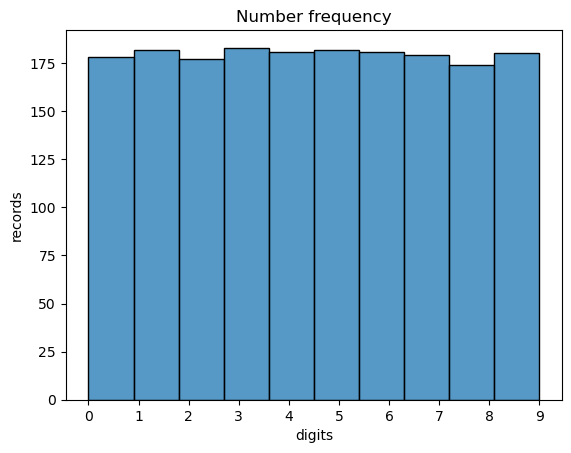

In [18]:
sns.histplot(digits.target, bins = 10)
plt.xlabel('digits')
plt.ylabel('records')
plt.title('Number frequency')
plt.xticks(np.arange(10))
plt.show()
plt.show()

## Metrics

### Classification report
Build a text report showing the main classification metrics.
Text summary of the precision, recall, F1 score for each class.
The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification). Micro average (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

```python
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5

y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3
```

### Confusion matrix
The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class (Wikipedia and other references may use different convention for axes).

By definition, entry i and j in a confusion matrix is the number of observations actually in group i, but predicted to be in group j.

```python
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
# >>> array([[2, 0, 0],
#            [0, 0, 1],
#            [1, 0, 2]])
```

![alt text](image.png)

## Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

1. The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

2. The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

### Classification
SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. It also lacks some of the attributes of SVC and NuSVC, like support_. LinearSVC uses squared_hinge loss and due to its implementation in liblinear it also regularizes the intercept, if considered. This effect can however be reduced by carefully fine tuning its intercept_scaling parameter, which allows the intercept term to have a different regularization behavior compared to the other features. The classification results and score can therefore differ from the other two classifiers.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):

```python
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
#>>>SVC()
```

After being fitted, the model can then be used to predict new values:

```python
clf.predict([[2., 2.]])
#>>>array([1])
```

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

```python
# get support vectors
clf.support_vectors_
#>>>array([[0., 0.],
       [1., 1.]])
# get indices of support vectors
clf.support_
#>>>array([0, 1]...)
# get number of support vectors for each class
clf.n_support_
#>>>array([1, 1]...)
```

### Sci-kit learn Model 

Tools for model selection, such as cross validation and hyper-parameter tuning.

### Train - Test Split
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation, next(ShuffleSplit().split(X, y)), and application to input data into a single call for splitting (and optionally subsampling) data into a one-liner.

Example:

```python
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
#>>>array([[0, 1],
#       [2, 3],
#       [4, 5],
#       [6, 7],
#       [8, 9]])
list(y)
#>>>[0, 1, 2, 3, 4]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train
#>>>array([[4, 5],
#       [0, 1],
#       [6, 7]])
y_train
#>>>[2, 0, 3]
X_test
#>>>array([[2, 3],
#       [8, 9]])
y_test
#>>>[1, 4]
```

#### Significance of shuffle

```python
train_test_split(y, shuffle=False)
#>>>[[0, 1, 2], [3, 4]]
```

### SVC
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer or other Kernel Approximation.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided kernel functions and how gamma, coef0 and degree affect each other, see the corresponding section in the narrative documentation: Kernel functions.


```python
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
#>>>Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])

print(clf.predict([[-0.8, -1]]))
#>>>[1]
```

### Standard Scaler (for completeness, not used in the project)
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$ z = (x - u) / s $$

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

StandardScaler is sensitive to outliers, and the features may scale differently from each other in the presence of outliers. For an example visualization, refer to Compare StandardScaler with other scalers.

This scaler can also be applied to sparse CSR or CSC matrices by passing with_mean=False to avoid breaking the sparsity structure of the data.



```python
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler()
print(scaler.mean_)
#>>>[0.5 0.5]
print(scaler.transform(data))
#>>>[[-1. -1.]
# [-1. -1.]
# [ 1.  1.]
# [ 1.  1.]]
print(scaler.transform([[2, 2]]))
#>>>[[3. 3.]]
```


### Make pipeline (for completeness, not used in the project)

Construct a Pipeline from the given estimators.

This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.

```python
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), GaussianNB(priors=None))
#>>>Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('gaussiannb', GaussianNB())])
```

## Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image. As digits.images is of type numpy.ndarray we can use np.reshape((n_samples, -1)). By using the '-1' as value form number of columns NumPy calculates the number of columns automatically by dividing the total number of elements in the array by n_samples.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.



In [19]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [26]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [27]:
len(data[0])

64

In [29]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
clf

SVC(gamma=0.001)

The gamma parameter in Scikit-learn's Support Vector Machine (SVM) classifier SVC is a crucial hyperparameter that determines how much influence a single training example has on the decision boundary. It plays a significant role in shaping the model's decision boundary when using non-linear kernels, such as the Radial Basis Function (RBF) kernel, which is the default kernel in Scikit-learn's SVC.

A small value of gamma means that each training example has a far-reaching influence, resulting in a smoother and broader decision boundary. This makes the model less sensitive to individual data points, which can be beneficial when the data is noisy. However, if the value is too low, the model might underfit the data, leading to poor performance on both the training and test sets.
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
* if ‘auto’, uses 1 / n_features
* if float, must be non-negative

**NB!** kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

### RBF kernel

The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. It measures similarity between two data points in **infinite dimensions** and then approaches classification by majority vote. The kernel function is defined as:

$$K(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\gamma \cdot
    {\|\mathbf{x}_1 - \mathbf{x}_2\|^2}\right)$$
where ${\gamma}$ (gamma) controls the influence of each individual training sample on the decision boundary.

The larger the euclidean distance between two points $\|\mathbf{x}_1 - \mathbf{x}_2\|^2$ the closer the kernel function is to zero. This means that two points far away are more likely to be dissimilar.


![alt text](image-1.png)

In the plot we can see how the decision boundaries tend to contract around data points that are close to each other.